# IMDB Data Project
Craig Gossen

**This project is to analyze what makes a movie successful and provide recommendations to the stakeholder on how to make a successful movie.** 

Data Source: (https://www.themoviedb.org/)


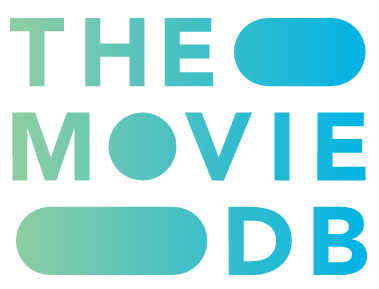

## Exploratory Data Analysis

In [1]:
#Load the datasets
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

df2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory=False)
df2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory=False)

In [2]:
#Combine the two dataframes
df = pd.concat((df2000, df2001), ignore_index=True)
df.to_csv('Data/tmdb_results_combined.csv.gz', compression="gzip", index=False)

In [3]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2102.0,PG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2518 non-null   object 
 1   adult                  2516 non-null   float64
 2   backdrop_path          1337 non-null   object 
 3   belongs_to_collection  202 non-null    object 
 4   budget                 2516 non-null   float64
 5   genres                 2516 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2516 non-null   float64
 8   original_language      2516 non-null   object 
 9   original_title         2516 non-null   object 
 10  overview               2464 non-null   object 
 11  popularity             2516 non-null   float64
 12  poster_path            2253 non-null   object 
 13  production_companies   2516 non-null   object 
 14  production_countries   2516 non-null   object 
 15  rele

1. How many movies had at least some valid financial information?

In [5]:
#Filtering for budget and revenue
budget_filter = df.query('budget != 0 & revenue !=0')
print(f'There are {len(budget_filter)} movies with budget and revenue > 0.')

There are 354 movies with budget and revenue > 0.


In [6]:
budget_filter.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2102.0,PG
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
13,tt0120630,0.0,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.737,4257.0,G
16,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.908,267.0,R


2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [7]:
budget_filter['certification'].value_counts().sort_index(ascending = False)

R        142
PG-13    117
PG        30
NR         6
G         13
Name: certification, dtype: int64

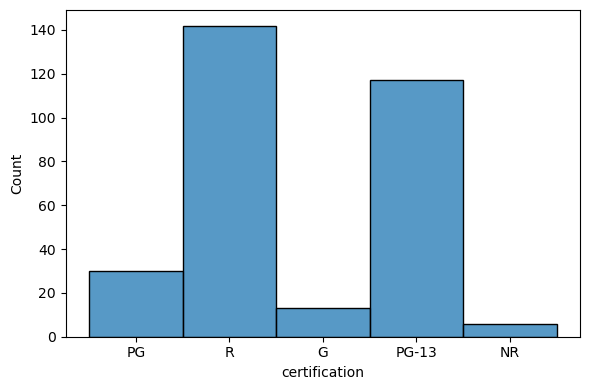

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(data = budget_filter, 
            x = 'certification') 
plt.tight_layout()
          
plt.show();

3. What is the average revenue per certification category?

In [9]:
filmcats = ['G', 'PG', 'PG-13', 'R', 'NR']

for x in filmcats:
    #https://www.listendata.com/2020/12/how-to-use-variable-in-query-in-pandas.html
    g_df = budget_filter.query('certification == "{0}" '.format(x))
    avg = g_df['revenue'].mean()
    print(f'The average {x}-rated film revenue is {round(avg):,.0f}.\n')


The average G-rated film revenue is 133,216,882.

The average PG-rated film revenue is 130,490,399.

The average PG-13-rated film revenue is 111,073,959.

The average R-rated film revenue is 52,945,475.

The average NR-rated film revenue is 23,823,316.



In [10]:
avg_rev = budget_filter.groupby(['certification'])['revenue'].mean()
avg_rev

certification
G        1.332169e+08
NR       2.382332e+07
PG       1.304904e+08
PG-13    1.110740e+08
R        5.294547e+07
Name: revenue, dtype: float64

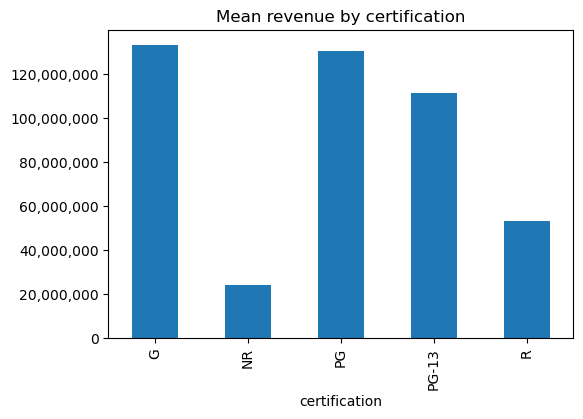

In [11]:
#Plot
ax = avg_rev.plot(kind='bar',
               title="Mean revenue by certification",
               figsize = (6,4))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

4. What is the average budget per certification category?

In [12]:
for x in filmcats:
    #https://www.listendata.com/2020/12/how-to-use-variable-in-query-in-pandas.html
    g_df = budget_filter.query('certification == "{0}" '.format(x))
    avg = g_df['budget'].mean()
    print(f'The average {x}-rated film budget is {round(avg):,.0f}.\n')

The average G-rated film budget is 44,000,000.

The average PG-rated film budget is 52,183,334.

The average PG-13-rated film budget is 46,806,815.

The average R-rated film budget is 27,063,479.

The average NR-rated film budget is 14,783,333.



In [13]:
avg_budg = budget_filter.groupby(['certification'])['budget'].mean()
avg_budg

certification
G        4.400000e+07
NR       1.478333e+07
PG       5.218333e+07
PG-13    4.680682e+07
R        2.706348e+07
Name: budget, dtype: float64

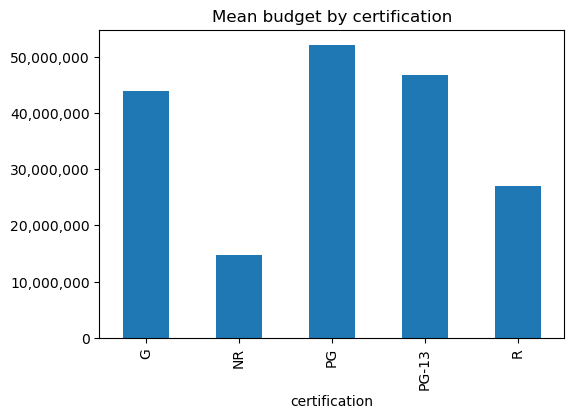

In [14]:
#Plot
ax = avg_budg.plot(kind='bar',
               title="Mean budget by certification",
               figsize = (6,4))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))